# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


# DATA CLEANING

In [4]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
df['weather'] = df['weather'].replace({1 : 'Clear, Few clouds, Partly cloudy, Partly cloudy' , 
                                       2 : 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                       3 : 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                       4 : 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog '})

In [6]:
df['workingday'] = df['workingday'].replace({1 : True,
                                             0 : False})

In [7]:
df['season'] = df['season'].replace({1 : 'spring',
                                     2 : 'summer',
                                     3 : 'fall',
                                     4 : 'winter'})

In [8]:
df['holiday'] = df['holiday'].replace({1 : True,
                                       0 : False})

In [9]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,spring,False,False,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",13.12,17.425,76,0.0000,8,6,14


In [10]:
df['dates'] = pd.to_datetime(df['datetime']).dt.date
df['time'] = pd.to_datetime(df['datetime']).dt.time

In [11]:
df['dates'] = pd.to_datetime(df['dates'])
df['datetime'] = pd.to_datetime(df['datetime'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  bool          
 3   workingday  10886 non-null  bool          
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  dates       10886 non-null  datetime64[ns]
 13  time        10886 non-null  object        
dtypes: bool(2), datetime64[ns](2), float64(3), int64(4), object(3)
memory usage: 1.0+ MB


In [13]:
df.set_index('datetime',inplace = True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dates,time
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0000,3,13,16,2011-01-01,00:00:00
2011-01-01 01:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0000,8,32,40,2011-01-01,01:00:00
2011-01-01 02:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0000,5,27,32,2011-01-01,02:00:00
2011-01-01 03:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0000,3,10,13,2011-01-01,03:00:00
2011-01-01 04:00:00,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0000,0,1,1,2011-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,winter,False,True,"Clear, Few clouds, Partly cloudy, Partly cloudy",15.58,19.695,50,26.0027,7,329,336,2012-12-19,19:00:00
2012-12-19 20:00:00,winter,False,True,"Clear, Few clouds, Partly cloudy, Partly cloudy",14.76,17.425,57,15.0013,10,231,241,2012-12-19,20:00:00
2012-12-19 21:00:00,winter,False,True,"Clear, Few clouds, Partly cloudy, Partly cloudy",13.94,15.910,61,15.0013,4,164,168,2012-12-19,21:00:00


In [14]:
df['year'] = df.index.year
df['month'] = df.index.month

In [15]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'dates',
       'time', 'year', 'month'],
      dtype='object')

In [16]:
df = df[['dates', 'time', 'year', 'month' , 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

In [17]:
df.head(10)

,dates,time,year,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01,00:00:00,2011,1,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,2011-01-01,01:00:00,2011,1,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,2011-01-01,02:00:00,2011,1,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,2011-01-01,03:00:00,2011,1,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,2011-01-01,04:00:00,2011,1,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,2011-01-01,05:00:00,2011,1,spring,False,False,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,2011-01-01,06:00:00,2011,1,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,2011-01-01,07:00:00,2011,1,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,2011-01-01,08:00:00,2011,1,spring,False,False,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0000,1,7,8


#Q. Holidays pe total kitna cycle gaya ?
#Q. Working days pe total kitna cycle gaya ?
#Q. Kaun se month me sabse zada cycle gaya ? 
#Q. Heavy rain wala days pe total kitna cycle gaya ?
#Q. Mean / median sabka maybe
#1) plot the graph for month vs casual and registered.
#2) what time of the day have max temperature?
#3) how many times it rained in non rainy season?
#4) what is the favorite season for casual bikers?
#5) list of working days with no holidays and have heavy rained on that day(most manhus day)?

In [18]:
mon = df.groupby(df['dates'].dt.month_name(locale = 'English')).sum().reset_index().drop(['year','month','temp','atemp','humidity','windspeed'],axis = 1)
mon

,dates,holiday,workingday,casual,registered,count
0,April,48,597,39813,127589,167402
1,August,0,672,45870,167646,213516
2,December,0,624,14700,145460,160160
3,February,0,638,9297,89816,99113
4,January,71,550,7252,72632,79884
5,July,48,600,50947,163670,214617
6,June,0,624,48574,172159,220733
7,March,0,640,25056,108445,133501
8,May,0,672,41285,158862,200147
9,November,48,599,25353,151087,176440


In [19]:
df2=df.groupby([df['dates'].dt.year, df['dates'].dt.month_name(locale = 'English')]).sum().drop(['year','month','temp','atemp','humidity','windspeed'],axis=1)
df2

holiday  workingday  casual  registered   count
dates dates                                                     
2011  April           24         287   12229       38288   50517
      August           0         360   17580       65716   83296
      December         0         312    5079       56104   61183
      February         0         327    3776       29068   32844
      January         24         264    2008       21544   23552
      July            24         288   26145       66703   92848
      June             0         312   19600       70176   89776
      March            0         328    7910       30825   38735
      May              0         336   15865       63848   79713
      November        24         312   10155       60734   70889
      October         24         287   17159       62363   79522
      September       24         285   18311       60793   79104
2012  April           24         310   27584       89301  116885
      August           0         312   28290      101930  130220
      December         0         312    9621       89356   98977
      February         0         311    5521       60748   66269
      January         47         286    5244       51088   56332
      July            24         312   24802       96967  121769
      June             0         312   28974      101983  130957
      March            0         312   17146       77620   94766
      May              0         336   25420       95014  120434
      November        24         287   15198       90353  105551
      October         24         336   20928      106984  127912
      September       24         288   27590      105835  133425

# Basic Description

In [20]:
df.describe().drop(['year','month'] , axis = 1)

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# No.Of Cycles used on Holidays


In [21]:
filt = df['holiday'] == True
df.loc[filt][['casual','registered','count']].sum()

casual        15171
registered    42637
count         57808
dtype: int64

In [22]:
px.histogram(df , x = "dates", y=["count"], color="holiday")

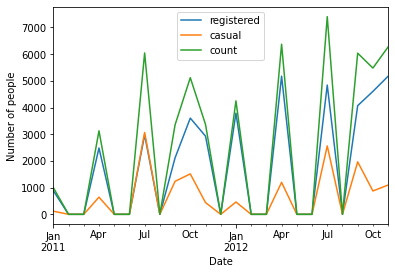

In [23]:
filt = df['holiday'] == True
mon_reg = df.loc[filt]['registered'].resample('M').sum()
mon_cas = df.loc[filt]['casual'].resample('M').sum()
mon_cou = df.loc[filt]['count'].resample('M').sum()
mon_reg.plot(label='registered')
mon_cas.plot(label='casual')
mon_cou.plot(label='count')

plt.xlabel('Date')
plt.ylabel('Number of people')
plt.legend()

In [25]:
fig = px.line(df, x='dates', y='casual', facet_col='holiday',
             facet_col_wrap=2, title='Holiday Casual Bikers')
fig

# No.Of Cycles used on Workingdays

In [26]:
filt = df['workingday'] == True
df.loc[filt][['casual','registered','count']].sum()

casual         186098
registered    1244506
count         1430604
dtype: int64

In [27]:
px.histogram(df , x = "dates", y=["count"], color="workingday")

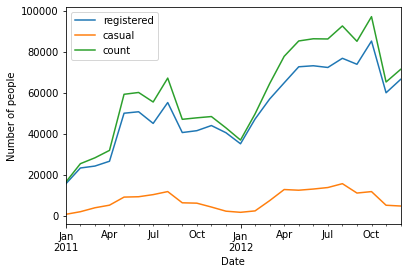

In [28]:
filt = df['workingday'] == True
mon_reg = df.loc[filt]['registered'].resample('M').sum()
mon_cas = df.loc[filt]['casual'].resample('M').sum()
mon_cou = df.loc[filt]['count'].resample('M').sum()
mon_reg.plot(label='registered')
mon_cas.plot(label='casual')
mon_cou.plot(label='count')

plt.xlabel('Date')
plt.ylabel('Number of people')
plt.legend()

In [30]:
fig = px.line(df, x='dates', y='casual', facet_col='workingday',
             facet_col_wrap=2, title='Holiday Casual Bikers')
fig

# Monthly Cycle Usage

In [31]:
fig = px.bar(mon, x = 'dates', y = 'count', title='Monthly usage')

fig = px.bar(mon, x = 'dates', y = 'count', text='count', color='dates')
# Put bar total value above bars with 2 values of precision
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig.update_layout(xaxis_tickangle=-45)
fig.show()



Text(0, 0.5, 'Months')

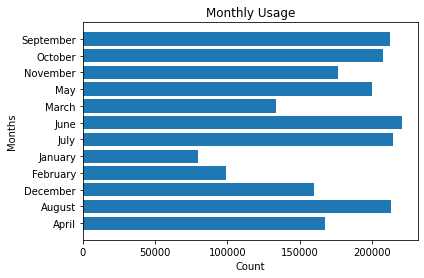

In [32]:
plt.barh(mon['dates'] , mon['count'])
plt.title('Monthly Usage')
plt.xlabel('Count')
plt.ylabel('Months')

# Count of Cycles on Heavy rainfall days

In [33]:
filt = df['weather']=='Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog '
df.loc[filt][['casual','registered','count']].sum()


casual          6
registered    158
count         164
dtype: int64

# Plot Graph For Month vs Casual & Registered

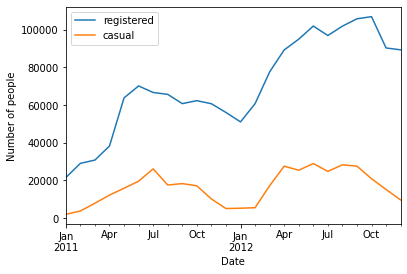

In [34]:
mon_reg = df['registered'].resample('M').sum()
mon_cas = df['casual'].resample('M').sum()
mon_reg.plot(label='registered')
mon_cas.plot(label='casual')

plt.xlabel('Date')
plt.ylabel('Number of people')
plt.legend()

In [35]:
fig = px.line(mon , x = 'dates' , y = ['casual','registered','count'] , labels = {'value' : 'Numbers'})
fig.show()

# Times it Rained on a Non Rainy Season

In [36]:
nonrain=df[(df['season']!='fall')&((df['weather']=='Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')|(df['weather']=='Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'))]
nonrain.reset_index()

,datetime,dates,time,year,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 18:00:00,2011-01-01,18:00:00,2011,1,spring,False,False,"Light Snow, Light Rain + Thunderstorm + Scatte...",17.22,21.210,88,16.9979,9,26,35
1,2011-01-01 19:00:00,2011-01-01,19:00:00,2011,1,spring,False,False,"Light Snow, Light Rain + Thunderstorm + Scatte...",17.22,21.210,88,16.9979,6,31,37
2,2011-01-02 06:00:00,2011-01-02,06:00:00,2011,1,spring,False,False,"Light Snow, Light Rain + Thunderstorm + Scatte...",17.22,21.210,77,19.9995,0,2,2
3,2011-01-02 08:00:00,2011-01-02,08:00:00,2011,1,spring,False,False,"Light Snow, Light Rain + Thunderstorm + Scatte...",16.40,20.455,71,15.0013,0,8,8
4,2011-01-02 14:00:00,2011-01-02,14:00:00,2011,1,spring,False,False,"Light Snow, Light Rain + Thunderstorm + Scatte...",14.76,17.425,76,12.9980,4,55,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2012-12-16 18:00:00,2012-12-16,18:00:00,2012,12,winter,False,False,"Light Snow, Light Rain + Thunderstorm + Scatte...",15.58,19.695,82,7.0015,8,99,107
656,2012-12-17 04:00:00,2012-12-17,04:00:00,2012,12,winter,False,True,"Light Snow, Light Rain + Thunderstorm + Scatte...",14.76,18.940,100,0.0000,2,3,5
657,2012-12-17 16:00:00,2012-12-17,16:00:00,2012,12,winter,False,True,"Light Snow, Light Rain + Thunderstorm + Scatte...",16.40,20.455,94,16.9979,15,287,302
658,2012-12-17 23:00:00,2012-12-17,23:00:00,2012,12,winter,False,True,"Light Snow, Light Rain + Thunderstorm + Scatte...",17.22,21.210,94,15.0013,6,41,47


# Favourite Seasons of diff. Bikers 

In [37]:
fav = df.groupby('season')
fav[['casual','registered','count']].sum().sort_values(by ='count' , ascending = False)

,casual,registered,count
season,,,
fall,142718,497944,640662
summer,129672,458610,588282
winter,78140,465894,544034
spring,41605,270893,312498


In [38]:
filt = (df['holiday']==False) & (df['workingday']==True) & (df['weather']=='Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ')
df.loc[filt]

,dates,time,year,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,,,,,
2012-01-09 18:00:00,2012-01-09,18:00:00,2012,1,spring,False,True,Heavy Rain + Ice Pallets + Thunderstorm + Mist...,8.2,11.365,86,6.0032,6,158,164
